In [11]:
import scipy.io
import os
folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'

data = {}
def export(matls, dists, filename):
    for matl in matls:
        for d in dists:
            d_f = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv') % (d, matl))
            d_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv') % (d, matl))
            print(matl, d, len(d_f), len(d_t))
            plt.scatter(np.unwrap(d_f['PHASE']) - np.unwrap(d_t['PHASE']), d_f['RSSI'] - d_t['RSSI'])
            data['d%d_%s_rssi_f' % (d, matl)] = d_f['RSSI'].values
            data['d%d_%s_rssi_t' % (d, matl)] = d_t['RSSI'].values
            data['d%d_%s_phase_f' % (d, matl)] = d_f['PHASE'].values
            data['d%d_%s_phase_t' % (d, matl)] = d_t['PHASE'].values
    scipy.io.savemat('%s.mat' % filename, data)

oil 6 50 50
oil 7 50 50
oil 8 50 50


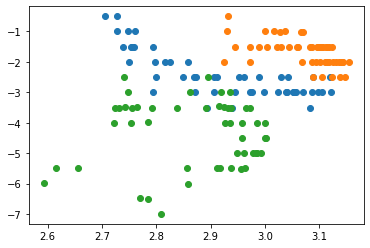

In [12]:
export(['oil'], [6, 7, 8], 'oil_d678')

6 ['oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil'
 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil'
 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil'
 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil'
 'oil' 'oil']
Correct 1.0
-------------------------------
7 ['oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil'
 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil'
 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil'
 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil'
 'oil' 'oil']
Correct 1.0
-------------------------------
8 ['liquor' 'liquor' 'liquor' 'liquor' 'liquor' 'liquor' 'liquor' 'liquor'
 'liquor' 'liquor' 'liquor' 'liquor' 'liquor' 'liquor' 'liquor' 'liquor'
 'liquor' 'liquor' 'oil' 'oil' 'oil' 'oil' 'liquor' 'oil' 'oil' 'oil'
 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil'
 'oil

NameError: name 'matls' is not defined

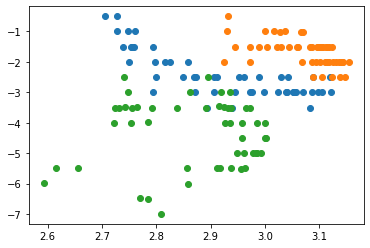

In [14]:
import joblib
folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'
clf = joblib.load('model_all_nopi.joblib')

cnt = 0
correctcnt = 0

dists = [6, 7, 8]
for d in dists:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd%d_oil_f_kde.csv' % (d)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_oil_t_kde.csv' %(d)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    plt.scatter(diff_p, diff_r)
#     result = tree.predict(np.column_stack((diff_p, diff_r, df_t['CHANNEL'])))
    result = clf.predict(np.column_stack((diff_p, diff_r)))
    print(d, result)
    correct = (result=='oil').sum()
    print('Correct', correct/len(df_f))
    cnt += len(df_f)
    correctcnt += correct
    print('-------------------------------')
plt.legend(matls)
plt.xlim([-6, 6])
plt.ylim([-7, 3])
print(correctcnt, cnt, correctcnt/cnt)